# Predicting Survival Passenger

[ref](https://qiita.com/suzumi/items/8ce18bc90c942663d1e6)

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier

import csv

In [2]:
os.getcwd()

'/home/jovyan/BigDataAnalytics/bda_py_folder/class3/titanic_bda/survival_classification/notebooks'

In [5]:
os.chdir("/home/jovyan/BigDataAnalytics/bda_py_folder/class3/titanic_bda/survival_classification/")
os.getcwd()

'/home/jovyan/BigDataAnalytics/bda_py_folder/class3/titanic_bda/survival_classification'

In [7]:
os.listdir()

['.DS_Store',
 'LICENSE',
 'requirements.txt',
 'references',
 'Makefile',
 'models',
 'docs',
 'README.md',
 'setup.py',
 '.gitignore',
 '.env',
 'tox.ini',
 '.git',
 'data',
 'notebooks',
 'test_environment.py',
 'reports',
 'src']

# prepare data

In [10]:
df= pd.read_csv("data/raw/train.csv").replace("male",0).replace("female",1)

# preprocessing

 ## missing data

In [11]:
df["Age"].fillna(df.Age.median(), inplace=True)

## check data

([array([  80.,   97.,  372.]), array([ 216.,  184.,  491.])],
 array([ 1.        ,  1.66666667,  2.33333333,  3.        ]),
 <a list of 2 Lists of Patches objects>)

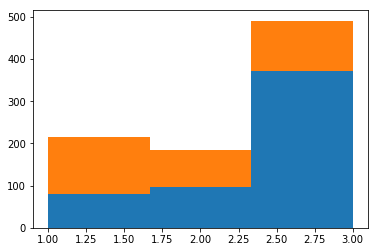

In [12]:
split_data = []
for survived in [0,1]:
    split_data.append(df[df.Survived==survived])

temp = [i["Pclass"].dropna() for i in split_data]
plt.hist(temp, histtype="barstacked", bins=3)

([array([  13.,   13.,    8.,   63.,   80.,  191.,   47.,   39.,   30.,
           23.,   14.,   11.,   10.,    3.,    4.,    0.]),
  array([  44.,   20.,   19.,   96.,  122.,  285.,   88.,   67.,   47.,
           39.,   24.,   18.,   14.,    3.,    4.,    1.])],
 array([  0.42   ,   5.39375,  10.3675 ,  15.34125,  20.315  ,  25.28875,
         30.2625 ,  35.23625,  40.21   ,  45.18375,  50.1575 ,  55.13125,
         60.105  ,  65.07875,  70.0525 ,  75.02625,  80.     ]),
 <a list of 2 Lists of Patches objects>)

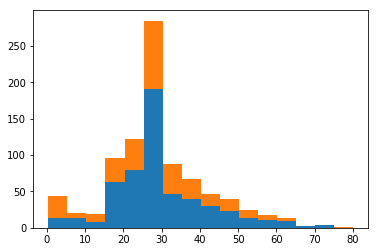

In [13]:
temp = [i["Age"].dropna() for i in split_data]
plt.hist(temp, histtype="barstacked", bins=16)

## make variables

In [14]:
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
df2 = df.drop(["Name", "SibSp", "Parch", "Ticket", "Fare", "Cabin", "Embarked"], axis=1)

In [15]:
# check types of df
df2.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
Age            float64
FamilySize       int64
dtype: object

In [16]:
df2.to_csv("data/processed/processed_df.csv")

# learning data

extract head 800 observations and use them as train dataset.<br>
Other 91 observation use as test dataset.

In [47]:
# train dataset
train_data = df2.values
xs = train_data[0:800, 2:] # Pclass以降の変数
y  = train_data[0:800, 1]  # 正解データ

In [48]:
# len(xs)
train_data.shape[0]

891

In [49]:
forest = RandomForestClassifier(n_estimators = 100)

# 学習
forest = forest.fit(xs, y)

test_df= pd.read_csv("test.csv").replace("male",0).replace("female",1)
# # 欠損値の補完
test_df["Age"].fillna(df.Age.median(), inplace=True)
test_df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
test_df2 = test_df.drop(["Name", "SibSp", "Parch", "Ticket", "Fare", "Cabin", "Embarked"], axis=1)

In [43]:
test_df2.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'FamilySize'], dtype='object')

In [46]:
test_df2.head

<bound method NDFrame.head of      PassengerId  Pclass  Sex   Age  FamilySize
0            892       3    0  34.5           2
1            893       3    1  47.0           2
2            894       2    0  62.0           1
3            895       3    0  27.0           2
4            896       3    1  22.0           1
5            897       3    0  14.0           1
6            898       3    1  30.0           1
7            899       2    0  26.0           5
8            900       3    1  18.0           3
9            901       3    0  21.0           2
10           902       3    0  28.0           3
11           903       1    0  46.0           1
12           904       1    1  23.0           1
13           905       2    0  63.0           7
14           906       1    1  47.0           1
15           907       2    1  24.0           1
16           908       2    0  35.0           6
17           909       3    0  21.0           1
18           910       3    1  27.0           2
19        

## predict data

In [55]:
# test dataset
xs_test = train_data[801:train_data.shape[0], 2:] # Pclass以降の変数
y  = train_data[801:train_data.shape[0], 1]  # 正解データ

output = forest.predict(xs_test)

print(len(y), len(output))
zip_data = zip(y.astype(int), output.astype(int))
predict_data = list(zip_data)
predict_data

90 90


[(1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 1),
 (1, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 0),
 (1, 1),
 (1, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 1),
 (1, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 1),
 (1, 1),
 (0, 1)]

In [57]:
train_data

array([[   1.,    0.,    3.,    0.,   22.,    2.],
       [   2.,    1.,    1.,    1.,   38.,    2.],
       [   3.,    1.,    3.,    1.,   26.,    1.],
       ..., 
       [ 889.,    0.,    3.,    1.,   28.,    4.],
       [ 890.,    1.,    1.,    0.,   26.,    1.],
       [ 891.,    0.,    3.,    0.,   32.,    1.]])

# save output file as csv

In [45]:
with open("class3/predict_result_data.csv", "w") as f:
    writer = csv.writer(f, lineterminator='\n')
    writer.writerow(["PassengerId", "Survived"])
    for pid, survived in zip(test_data[:,0].astype(int), output.astype(int)):
        writer.writerow([pid, survived])